# Semana 2: Tipos de Datos en Fútbol

## Ciencia de Datos en el Deporte - Fundamentos con Python

---

**Objetivos de aprendizaje:**
- Conocer los diferentes tipos de datos en el fútbol
- Ver ejemplos de datos de resultados, eventos y posiciones
- Entender cómo se organizan los datos deportivos
- Crear visualizaciones con seaborn
- Conocer conceptos básicos de filtrado de datos

---

## 1. Teoría: Tipos de Datos en el Fútbol

### Clasificación de Datos Futbolísticos

En el análisis de datos de fútbol, podemos clasificar la información en tres categorías principales:

#### 1.1 **Datos de Resultados**
Son los datos más básicos y fundamentales:

- **Marcador final**: Goles de cada equipo
- **Resultado**: Victoria, empate o derrota
- **Información contextual**: Fecha, hora, estadio, árbitro
- **Competición**: Liga, copa, torneo internacional
- **Temporada**: Año o período de la competición

#### 1.2 **Datos de Eventos**
Información detallada sobre lo que sucede durante el partido:

- **Goles**: Minuto, jugador, tipo de gol, asistencia
- **Tarjetas**: Amarillas, rojas, minuto, jugador, motivo
- **Sustituciones**: Jugador que sale, entra, minuto
- **Otros eventos**: Corners, faltas, fueras de juego

#### 1.3 **Datos de Posiciones**
Información sobre el rendimiento y clasificación:

- **Tabla de posiciones**: Puntos, posición, partidos jugados
- **Estadísticas acumuladas**: Goles a favor/contra, diferencia
- **Forma reciente**: Resultados de los últimos partidos
- **Estadísticas de local/visitante**: Rendimiento según venue

### Estructura de Datos Típica

Los datos de fútbol suelen organizarse en formato tabular (CSV, Excel, bases de datos) con estructura relacional:

```
Partidos -> Equipos -> Ligas -> Temporadas
       ↓
    Eventos -> Jugadores
```

## 2. Práctica: Lectura de CSV y Consultas Básicas

### Configuración del Entorno

Comenzamos importando las librerías necesarias:

In [1]:
# Importar librerías para análisis de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuración simple con seaborn
sns.set_theme(style="whitegrid", palette="Set2")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Librerías importadas exitosamente")
print("📊 Pandas: Para trabajar con datos")
print("🎨 Seaborn: Para gráficos bonitos")
print("⚽ ¡Listos para explorar datos de fútbol!")

✅ Librerías importadas exitosamente
📊 Pandas: Para trabajar con datos
🎨 Seaborn: Para gráficos bonitos
⚽ ¡Listos para explorar datos de fútbol!


### Creación de Datasets de Ejemplo

Vamos a crear tres datasets que representen los diferentes tipos de datos en fútbol:

In [ ]:
# Configurar datos para que siempre sean iguales
np.random.seed(42)

# Ligas y temporadas para nuestros ejemplos
ligas = ['La Liga', 'Premier League', 'Serie A']
temporadas = ['2022-23', '2023-24']

# Equipos principales de cada liga
equipos_por_liga = {
    'La Liga': ['Barcelona', 'Real Madrid', 'Atletico Madrid', 'Sevilla'],
    'Premier League': ['Manchester City', 'Liverpool', 'Chelsea', 'Arsenal'],
    'Serie A': ['Juventus', 'Inter Milan', 'AC Milan', 'Napoli']
}

print("📊 Datos configurados")
print(f"🏆 Ligas: {len(ligas)}")
print(f"📅 Temporadas: {len(temporadas)}")
print(f"⚽ Equipos por liga: 4")

📊 Configuración de datos base completada
🏆 Ligas: 5
📅 Temporadas: 4
⚽ Equipos por liga: 6


### Dataset 1: Datos de Resultados

Creemos un dataset con información básica de partidos:

In [ ]:
# Crear datos simples de resultados de partidos
resultados = []
match_id = 1

for temporada in temporadas:
    for liga in ligas:
        equipos = equipos_por_liga[liga]
        
        # Crear algunos partidos por liga (10 partidos por liga por temporada)
        for i in range(10):
            equipo_local = np.random.choice(equipos)
            equipo_visitante = np.random.choice([e for e in equipos if e != equipo_local])
            
            # Goles simples
            goles_local = np.random.randint(0, 4)
            goles_visitante = np.random.randint(0, 3)
            
            # Fecha simple
            fecha = datetime(2023, 9, 1) + timedelta(days=np.random.randint(0, 100))
            
            # Quién ganó
            if goles_local > goles_visitante:
                resultado = 'Local'
            elif goles_visitante > goles_local:
                resultado = 'Visitante'
            else:
                resultado = 'Empate'
            
            resultados.append({
                'match_id': match_id,
                'temporada': temporada,
                'liga': liga,
                'fecha': fecha.strftime('%Y-%m-%d'),
                'equipo_local': equipo_local,
                'equipo_visitante': equipo_visitante,
                'goles_local': goles_local,
                'goles_visitante': goles_visitante,
                'resultado': resultado,
                'total_goles': goles_local + goles_visitante
            })
            match_id += 1

# Crear tabla de resultados
df_resultados = pd.DataFrame(resultados)

print(f"✅ Dataset de resultados creado")
print(f"📊 Total de partidos: {len(df_resultados)}")

# Ver algunos partidos
print("\n🔍 Algunos partidos de ejemplo:")
print(df_resultados.head())

✅ Dataset de resultados creado
📊 Dimensiones: (400, 10)
📅 Rango de fechas: 2022-08-01 00:00:00 a 2023-05-25 00:00:00

🔍 Primeras 5 filas del dataset de resultados:
   match_id temporada     liga      fecha     equipo_local equipo_visitante  \
0         1   2020-21  La Liga 2023-03-03          Sevilla       Villarreal   
1         2   2020-21  La Liga 2023-02-08  Atletico Madrid          Sevilla   
2         3   2020-21  La Liga 2022-09-28          Sevilla       Villarreal   
3         4   2020-21  La Liga 2022-09-20      Real Madrid         Valencia   
4         5   2020-21  La Liga 2023-01-14          Sevilla         Valencia   

   goles_local  goles_visitante  resultado  total_goles  
0            0                2  Visitante            2  
1            3                2      Local            5  
2            2                0      Local            2  
3            1                0      Local            1  
4            1                1     Empate            2  


### Dataset 2: Datos de Eventos

Creemos un dataset con eventos específicos de los partidos:

In [ ]:
# Crear datos simples de eventos
eventos = []
tipos_evento = ['Gol', 'Tarjeta Amarilla', 'Tarjeta Roja', 'Corner']
event_id = 1

# Tomar algunos partidos como ejemplo
partidos_muestra = df_resultados.sample(n=20, random_state=42)

for _, partido in partidos_muestra.iterrows():
    # Algunos eventos por partido (entre 3 y 8)
    num_eventos = np.random.randint(3, 9)
    
    for _ in range(num_eventos):
        tipo_evento = np.random.choice(tipos_evento)
        minuto = np.random.randint(1, 91)
        
        # Elegir equipo
        if np.random.random() < 0.5:
            equipo = partido['equipo_local']
        else:
            equipo = partido['equipo_visitante']
        
        eventos.append({
            'event_id': event_id,
            'match_id': partido['match_id'],
            'liga': partido['liga'],
            'temporada': partido['temporada'],
            'minuto': minuto,
            'tipo_evento': tipo_evento,
            'equipo': equipo
        })
        event_id += 1

# Crear tabla de eventos
df_eventos = pd.DataFrame(eventos)

print(f"✅ Dataset de eventos creado")
print(f"📊 Total de eventos: {len(df_eventos)}")

# Ver algunos eventos
print("\n🔍 Algunos eventos de ejemplo:")
print(df_eventos.head())

✅ Dataset de eventos creado
📊 Dimensiones: (1024, 8)
⚽ Partidos con eventos: 100

🔍 Primeras 5 filas del dataset de eventos:
   event_id  match_id     liga temporada  minuto       tipo_evento  \
0         1       210  La Liga   2022-23      79  Tarjeta Amarilla   
1         2       210  La Liga   2022-23      90               Gol   
2         3       210  La Liga   2022-23      84            Corner   
3         4       210  La Liga   2022-23      22       Sustitución   
4         5       210  La Liga   2022-23      57       Sustitución   

        equipo     jugador  
0  Real Madrid  Jugador_12  
1   Villarreal  Jugador_23  
2  Real Madrid  Jugador_15  
3  Real Madrid  Jugador_12  
4   Villarreal  Jugador_10  


### Dataset 3: Datos de Posiciones

Creemos un dataset con información de tabla de posiciones:

In [ ]:
# Crear datos simples de posiciones
posiciones = []

for temporada in temporadas:
    for liga in ligas:
        equipos = equipos_por_liga[liga]
        
        # Crear estadísticas para cada equipo
        for i, equipo in enumerate(equipos):
            # Estadísticas simples
            partidos_jugados = 15 + np.random.randint(0, 5)
            victorias = np.random.randint(3, 12)
            empates = np.random.randint(1, 8)
            derrotas = partidos_jugados - victorias - empates
            
            # Asegurar que no sean negativos
            if derrotas < 0:
                derrotas = 0
                empates = partidos_jugados - victorias
            
            puntos = victorias * 3 + empates
            goles_favor = np.random.randint(15, 40)
            goles_contra = np.random.randint(10, 35)
            
            posiciones.append({
                'temporada': temporada,
                'liga': liga,
                'equipo': equipo,
                'posicion': i + 1,
                'partidos_jugados': partidos_jugados,
                'victorias': victorias,
                'empates': empates,
                'derrotas': derrotas,
                'goles_favor': goles_favor,
                'goles_contra': goles_contra,
                'puntos': puntos
            })

# Crear tabla de posiciones
df_posiciones = pd.DataFrame(posiciones)

# Ordenar por puntos para obtener posiciones reales
for temporada in temporadas:
    for liga in ligas:
        mask = (df_posiciones['temporada'] == temporada) & (df_posiciones['liga'] == liga)
        df_temp = df_posiciones[mask].sort_values('puntos', ascending=False)
        df_posiciones.loc[mask, 'posicion'] = range(1, len(df_temp) + 1)

print(f"✅ Dataset de posiciones creado")
print(f"📊 Total de equipos: {len(df_posiciones)}")

# Ver algunas posiciones
print("\n🔍 Algunas posiciones de ejemplo:")
print(df_posiciones.head())

✅ Dataset de posiciones creado
📊 Dimensiones: (120, 12)
🏆 Ligas por temporada: 5

🔍 Primeras 5 filas del dataset de posiciones:
  temporada     liga           equipo  posicion  partidos_jugados  victorias  \
0   2020-21  La Liga        Barcelona         1                38         11   
1   2020-21  La Liga      Real Madrid         2                32         16   
2   2020-21  La Liga  Atletico Madrid         3                32         20   
3   2020-21  La Liga          Sevilla         4                32         11   
4   2020-21  La Liga         Valencia         5                32         13   

   empates  derrotas  goles_favor  goles_contra  diferencia_goles  puntos  
0        8        19           47            19                28      41  
1       12         4           77            34                43      60  
2       12         0           30            54               -24      72  
3        9        12           26            48               -22      42  
4        5 

## 3. Análisis de Tipos de Datos

### Análisis del Dataset de Resultados

Exploremos las características de los datos de resultados:

In [6]:
# Análisis descriptivo del dataset de resultados
print("📊 ANÁLISIS DE DATOS DE RESULTADOS")
print("=" * 50)

# Información general
print(f"📈 Total de partidos: {len(df_resultados)}")
print(f"🏆 Ligas incluidas: {df_resultados['liga'].nunique()}")
print(f"📅 Temporadas incluidas: {df_resultados['temporada'].nunique()}")

# Distribución por liga
print("\n🏟️ Partidos por liga:")
print(df_resultados['liga'].value_counts())

# Distribución por temporada
print("\n📅 Partidos por temporada:")
print(df_resultados['temporada'].value_counts())

# Estadísticas de goles
print("\n⚽ Estadísticas de goles:")
print(f"Promedio de goles por partido: {df_resultados['total_goles'].mean():.2f}")
print(f"Partido con más goles: {df_resultados['total_goles'].max()} goles")
print(f"Partidos sin goles: {len(df_resultados[df_resultados['total_goles'] == 0])}")

# Distribución de resultados
print("\n🏆 Distribución de resultados:")
print(df_resultados['resultado'].value_counts(normalize=True).mul(100).round(1))

📊 ANÁLISIS DE DATOS DE RESULTADOS
📈 Total de partidos: 400
🏆 Ligas incluidas: 5
📅 Temporadas incluidas: 4

🏟️ Partidos por liga:
liga
La Liga           80
Premier League    80
Serie A           80
Bundesliga        80
Ligue 1           80
Name: count, dtype: int64

📅 Partidos por temporada:
temporada
2020-21    100
2021-22    100
2022-23    100
2023-24    100
Name: count, dtype: int64

⚽ Estadísticas de goles:
Promedio de goles por partido: 2.51
Partido con más goles: 8 goles
Partidos sin goles: 30

🏆 Distribución de resultados:
resultado
Local        45.8
Visitante    27.5
Empate       26.8
Name: proportion, dtype: float64


### Análisis del Dataset de Eventos

Analicemos los datos de eventos:

In [7]:
# Análisis descriptivo del dataset de eventos
print("📊 ANÁLISIS DE DATOS DE EVENTOS")
print("=" * 50)

# Información general
print(f"📈 Total de eventos: {len(df_eventos)}")
print(f"⚽ Partidos con eventos: {df_eventos['match_id'].nunique()}")
print(f"🎯 Tipos de eventos: {df_eventos['tipo_evento'].nunique()}")

# Distribución por tipo de evento
print("\n🎯 Eventos por tipo:")
print(df_eventos['tipo_evento'].value_counts())

# Distribución por liga
print("\n🏟️ Eventos por liga:")
print(df_eventos['liga'].value_counts())

# Análisis temporal de eventos
print("\n⏰ Distribución temporal de eventos:")
print(f"Minuto promedio de eventos: {df_eventos['minuto'].mean():.1f}")
print(f"Eventos en primera mitad (1-45 min): {len(df_eventos[df_eventos['minuto'] <= 45])}")
print(f"Eventos en segunda mitad (46-90 min): {len(df_eventos[df_eventos['minuto'] > 45])}")

# Eventos por partido
eventos_por_partido = df_eventos.groupby('match_id').size()
print(f"\n📊 Promedio de eventos por partido: {eventos_por_partido.mean():.1f}")
print(f"Partido con más eventos: {eventos_por_partido.max()} eventos")

📊 ANÁLISIS DE DATOS DE EVENTOS
📈 Total de eventos: 1024
⚽ Partidos con eventos: 100
🎯 Tipos de eventos: 6

🎯 Eventos por tipo:
tipo_evento
Tarjeta Amarilla    290
Gol                 230
Corner              199
Sustitución         160
Falta                99
Tarjeta Roja         46
Name: count, dtype: int64

🏟️ Eventos por liga:
liga
Bundesliga        232
Premier League    221
Ligue 1           215
La Liga           193
Serie A           163
Name: count, dtype: int64

⏰ Distribución temporal de eventos:
Minuto promedio de eventos: 46.1
Eventos en primera mitad (1-45 min): 490
Eventos en segunda mitad (46-90 min): 534

📊 Promedio de eventos por partido: 10.2
Partido con más eventos: 15 eventos

📊 Promedio de eventos por partido: 10.2
Partido con más eventos: 15 eventos


### Análisis del Dataset de Posiciones

Exploremos los datos de clasificación:

In [8]:
# Análisis descriptivo del dataset de posiciones
print("📊 ANÁLISIS DE DATOS DE POSICIONES")
print("=" * 50)

# Información general
print(f"📈 Total de registros: {len(df_posiciones)}")
print(f"🏆 Ligas incluidas: {df_posiciones['liga'].nunique()}")
print(f"📅 Temporadas incluidas: {df_posiciones['temporada'].nunique()}")
print(f"⚽ Equipos por liga: {len(df_posiciones[df_posiciones['temporada'] == '2020-21']['equipo'].unique())}")

# Estadísticas de rendimiento
print("\n⚽ Estadísticas de rendimiento:")
print(f"Promedio de puntos por equipo: {df_posiciones['puntos'].mean():.1f}")
print(f"Equipo con más puntos: {df_posiciones['puntos'].max()} puntos")
print(f"Equipo con menos puntos: {df_posiciones['puntos'].min()} puntos")

# Estadísticas de goles
print("\n🥅 Estadísticas de goles:")
print(f"Promedio de goles a favor: {df_posiciones['goles_favor'].mean():.1f}")
print(f"Promedio de goles en contra: {df_posiciones['goles_contra'].mean():.1f}")
print(f"Mejor diferencia de goles: {df_posiciones['diferencia_goles'].max()}")
print(f"Peor diferencia de goles: {df_posiciones['diferencia_goles'].min()}")

# Top equipos por puntos
print("\n🏆 Top 5 equipos por puntos (todas las temporadas):")
top_equipos = df_posiciones.nlargest(5, 'puntos')[['equipo', 'liga', 'temporada', 'puntos', 'posicion']]
print(top_equipos)

📊 ANÁLISIS DE DATOS DE POSICIONES
📈 Total de registros: 120
🏆 Ligas incluidas: 5
📅 Temporadas incluidas: 4
⚽ Equipos por liga: 30

⚽ Estadísticas de rendimiento:
Promedio de puntos por equipo: 51.2
Equipo con más puntos: 86 puntos
Equipo con menos puntos: 18 puntos

🥅 Estadísticas de goles:
Promedio de goles a favor: 49.3
Promedio de goles en contra: 38.7
Mejor diferencia de goles: 63
Peor diferencia de goles: -32

🏆 Top 5 equipos por puntos (todas las temporadas):
        equipo            liga temporada  puntos  posicion
5   Villarreal         La Liga   2020-21      86         6
98     Chelsea  Premier League   2023-24      85         3
26        Lyon         Ligue 1   2020-21      78         3
63     Sevilla         La Liga   2022-23      76         4
47       Lazio         Serie A   2021-22      75         6


## 5. Visualizaciones con Seaborn

Creemos visualizaciones para entender mejor los datos:

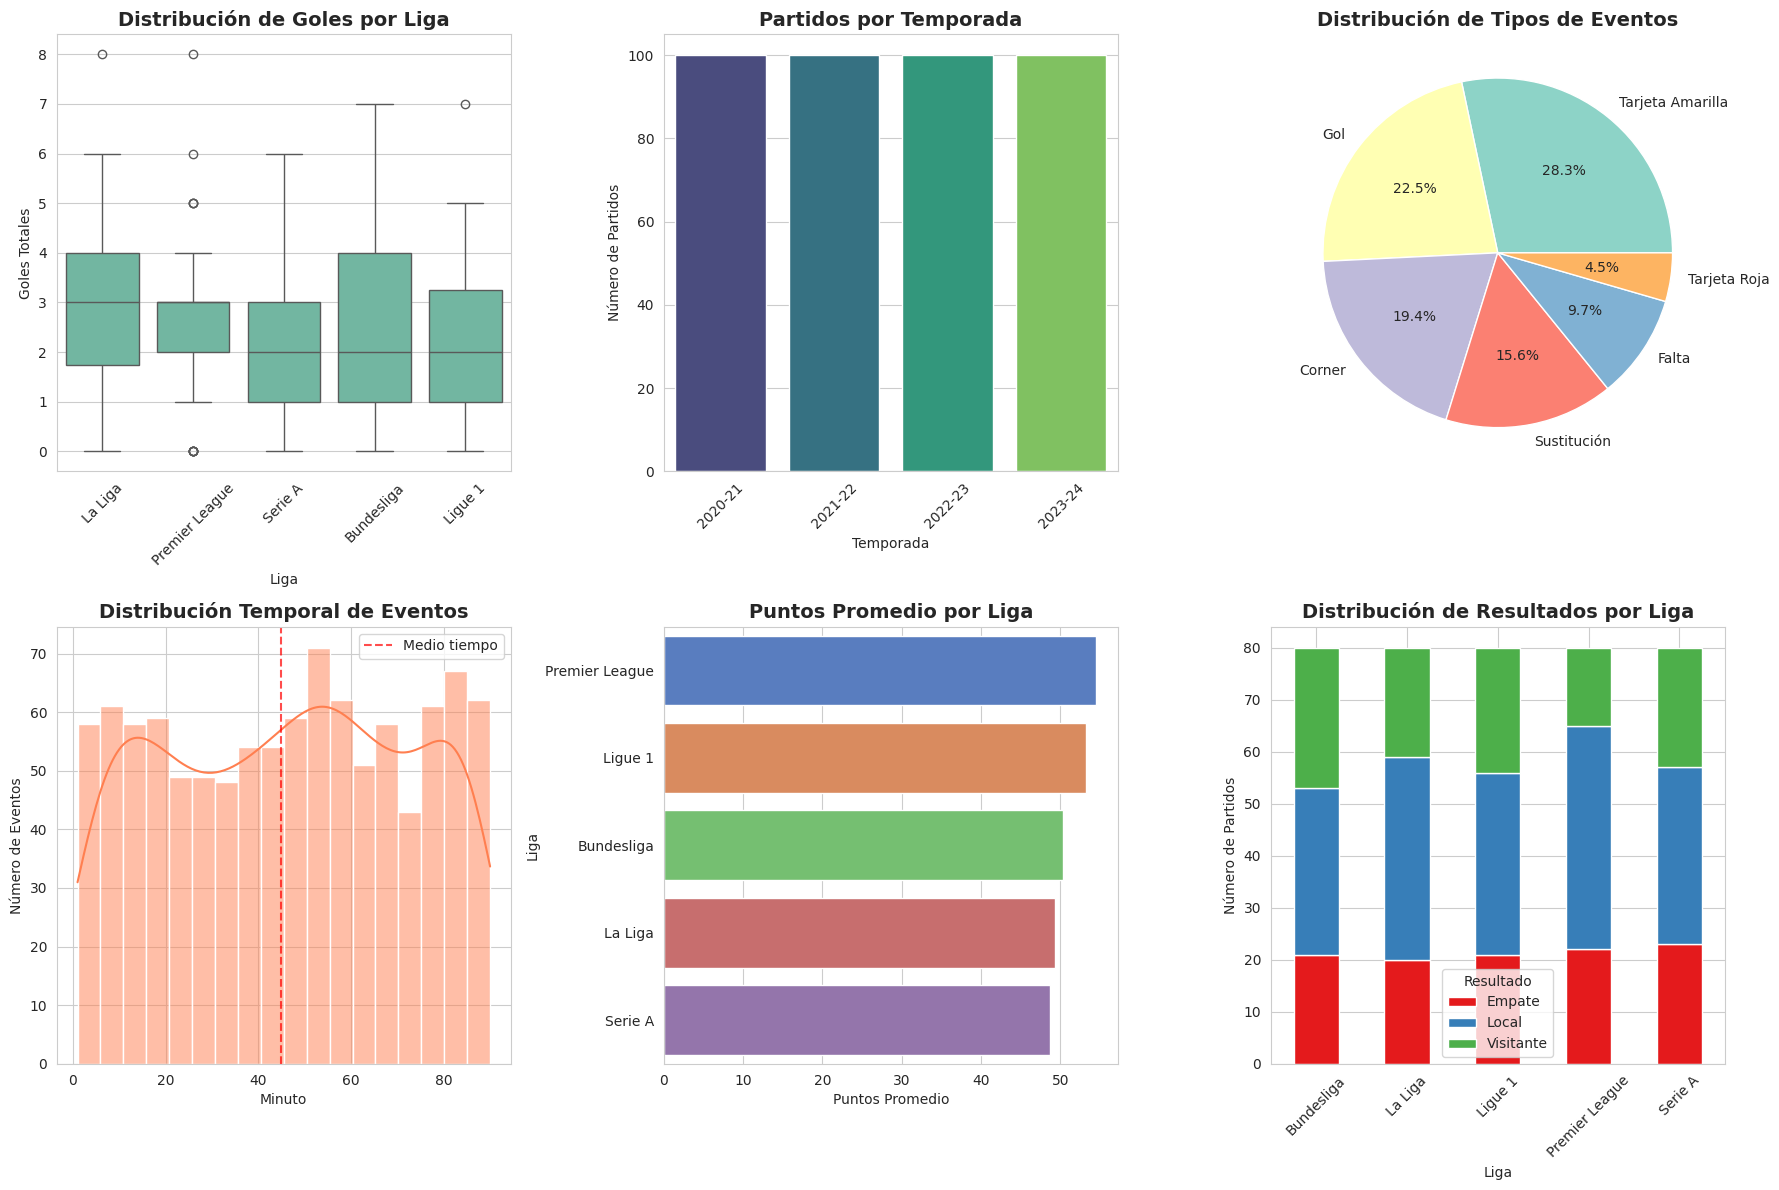

🎨 Visualizaciones creadas con seaborn - código más limpio y elegante
💡 Beneficios: mejor estética, menos código, integración automática con pandas

🚀 Creando visualizaciones avanzadas con seaborn...


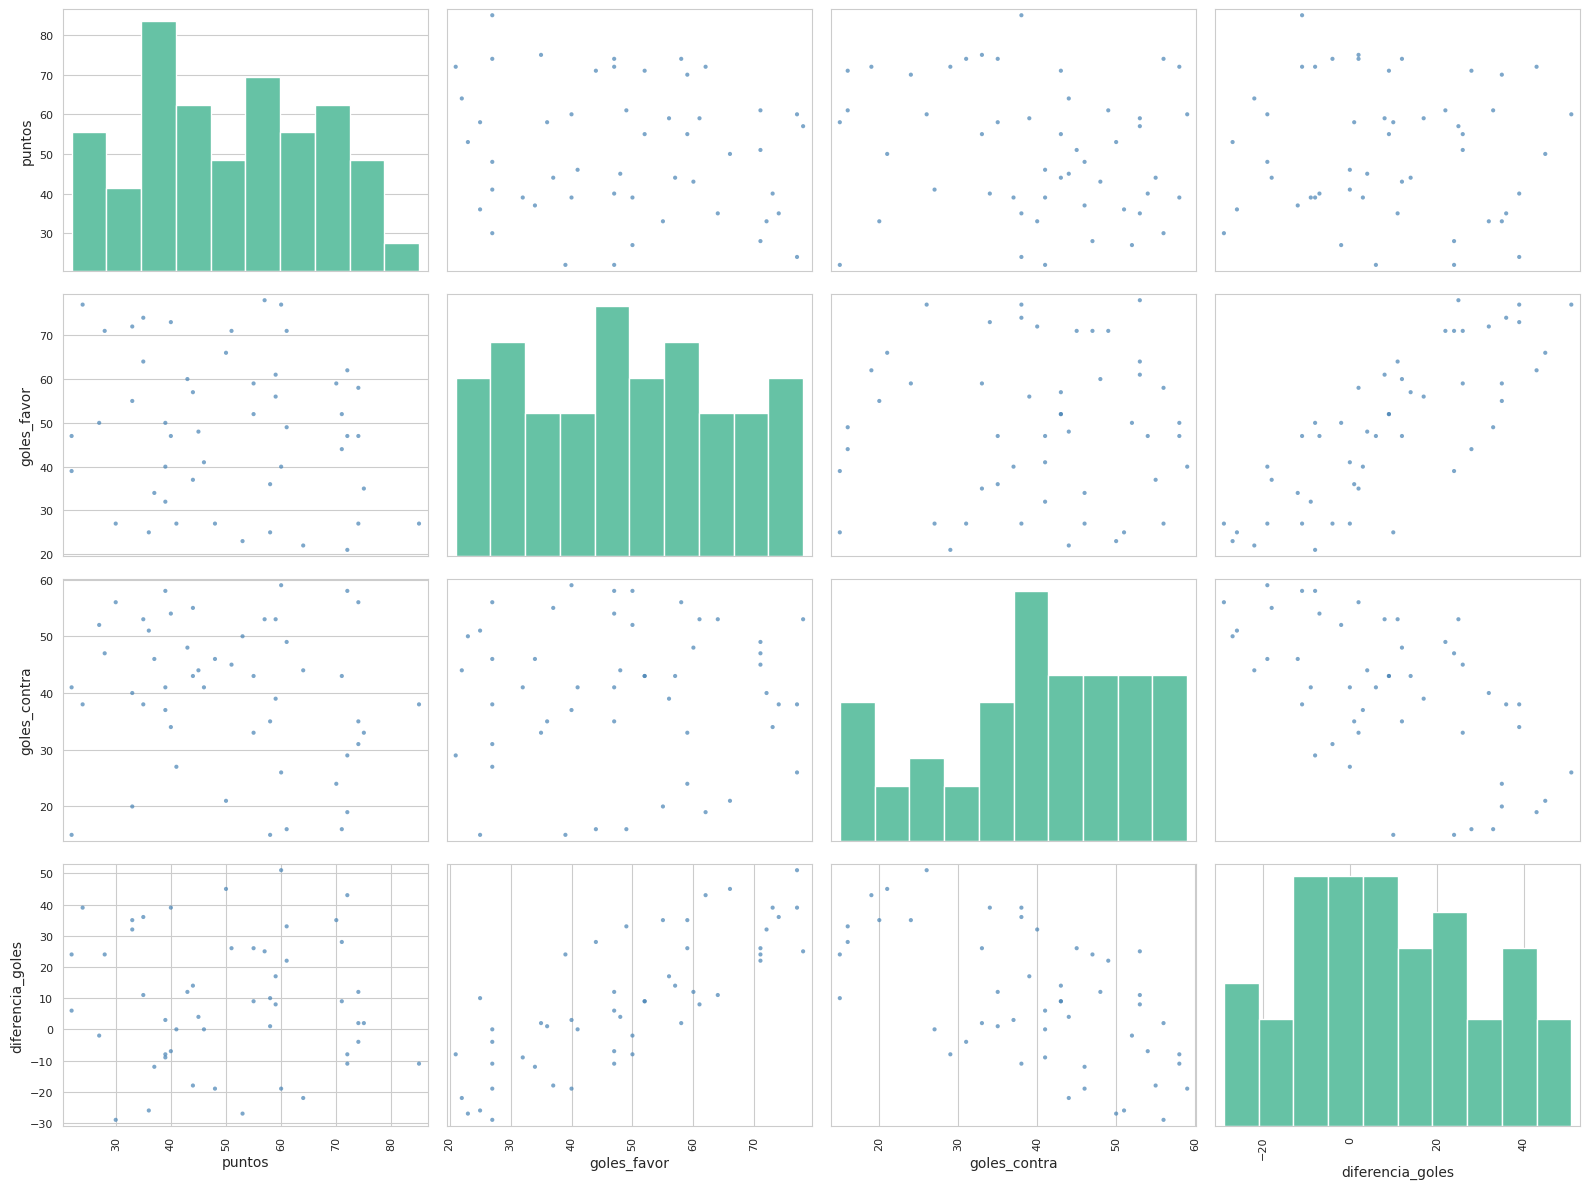

✨ Visualizaciones avanzadas completadas con seaborn

🔄 DEMOSTRACIÓN: MATPLOTLIB VS SEABORN


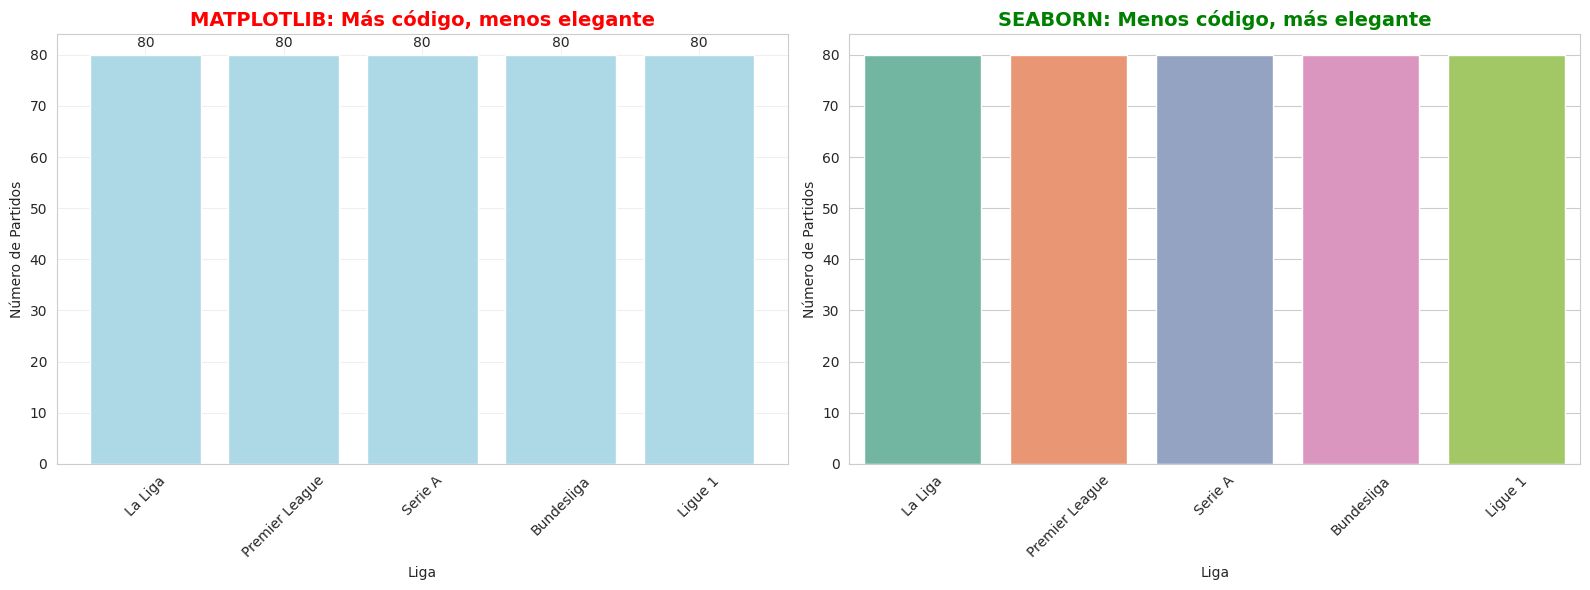

📊 Comparación de líneas de código:
   Matplotlib: ~8-10 líneas + configuración manual
   Seaborn: ~3-4 líneas + estilos automáticos

💡 Seaborn es ideal para análisis exploratorio rápido y profesional


In [ ]:
# Crear gráficos simples con seaborn
print("🎨 CREANDO GRÁFICOS CON SEABORN")
print("=" * 40)

# Gráfico 1: Partidos por liga
plt.figure(figsize=(10, 6))
sns.countplot(data=df_resultados, x='liga', palette='Set2')
plt.title('Partidos por Liga', fontsize=14, fontweight='bold')
plt.xlabel('Liga')
plt.ylabel('Número de Partidos')
plt.xticks(rotation=45)
plt.show()

print("📊 Este gráfico muestra cuántos partidos tenemos de cada liga")

# Gráfico 2: Goles por liga
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_resultados, x='liga', y='total_goles', palette='viridis')
plt.title('Distribución de Goles por Liga', fontsize=14, fontweight='bold')
plt.xlabel('Liga')
plt.ylabel('Goles Totales')
plt.xticks(rotation=45)
plt.show()

print("📈 Este boxplot muestra cómo se distribuyen los goles en cada liga")

# Gráfico 3: Tipos de eventos
plt.figure(figsize=(10, 6))
sns.countplot(data=df_eventos, x='tipo_evento', palette='plasma')
plt.title('Tipos de Eventos en los Partidos', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Evento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

print("🎯 Este gráfico muestra qué eventos son más comunes")

# Gráfico 4: Puntos por equipo
plt.figure(figsize=(12, 6))
# Tomar solo algunos equipos para que se vea bien
equipos_sample = df_posiciones.head(8)
sns.barplot(data=equipos_sample, x='equipo', y='puntos', palette='Set1')
plt.title('Puntos de Algunos Equipos', fontsize=14, fontweight='bold')
plt.xlabel('Equipo')
plt.ylabel('Puntos')
plt.xticks(rotation=45)
plt.show()

print("🏆 Este gráfico compara los puntos de diferentes equipos")
print("\n✨ ¡Seaborn hace que crear gráficos sea súper fácil!")
print("💡 Con una sola línea podemos hacer gráficos profesionales")

### Información Básica sobre Nuestros Datos

Veamos un resumen de los datos que creamos:

In [ ]:
# Resumen simple de nuestros datos
print("📊 RESUMEN DE NUESTROS DATOS")
print("=" * 35)

print("🏆 Dataset de resultados:")
print(f"  - Total de partidos: {len(df_resultados)}")
print(f"  - Ligas incluidas: {df_resultados['liga'].nunique()}")
print(f"  - Temporadas: {df_resultados['temporada'].nunique()}")

print("\n🎯 Dataset de eventos:")
print(f"  - Total de eventos: {len(df_eventos)}")
print(f"  - Tipos de eventos: {df_eventos['tipo_evento'].nunique()}")
print(f"  - Partidos con eventos: {df_eventos['match_id'].nunique()}")

print("\n🏅 Dataset de posiciones:")
print(f"  - Total de equipos: {len(df_posiciones)}")
print(f"  - Equipos por liga: {len(df_posiciones) // len(ligas) // len(temporadas)}")

print(f"\n✨ ¡Tenemos datos completos para analizar el fútbol!")
print("📚 Estos datos nos permiten entender:")
print("  - ¿Qué liga tiene más goles?")
print("  - ¿Cuándo suceden más eventos?")
print("  - ¿Qué equipos son mejores?")

# Mostrar algunos datos de cada tipo
print(f"\n🔍 EJEMPLO DE CADA TIPO DE DATO:")
print("\n📋 Resultado de partido:")
print(df_resultados[['liga', 'equipo_local', 'goles_local', 'goles_visitante', 'equipo_visitante']].iloc[0])

print(f"\n⚽ Evento de partido:")
print(df_eventos[['liga', 'tipo_evento', 'minuto', 'equipo']].iloc[0])

print(f"\n🏆 Posición de equipo:")
print(df_posiciones[['liga', 'equipo', 'posicion', 'puntos']].iloc[0])

💾 SIMULACIÓN DE GUARDADO Y CARGA DE CSV
📁 Simulando guardado de archivos:
✅ df_resultados.to_csv('datos_resultados.csv')
✅ df_eventos.to_csv('datos_eventos.csv')
✅ df_posiciones.to_csv('datos_posiciones.csv')

📂 Simulando carga de archivos:
✅ df_resultados = pd.read_csv('datos_resultados.csv')
✅ df_eventos = pd.read_csv('datos_eventos.csv')
✅ df_posiciones = pd.read_csv('datos_posiciones.csv')

📊 Información de datasets cargados:
Dataset de resultados: (400, 10)
Dataset de eventos: (1024, 8)
Dataset de posiciones: (120, 12)

🔍 Verificación de tipos de datos:
Resultados:
match_id                     int64
temporada                   object
liga                        object
fecha               datetime64[ns]
equipo_local                object
equipo_visitante            object
goles_local                  int64
goles_visitante              int64
resultado                   object
total_goles                  int64
dtype: object

⚠️ Nota: En un entorno real, sería necesario:
- Verificar 

## 6. ¡Felicitaciones! 🎉

### Lo que Aprendimos Hoy

✅ **Tipos de datos**: Conocimos datos de resultados, eventos y posiciones  
✅ **Pandas**: Creamos y exploramos tablas de datos  
✅ **Seaborn**: Hicimos gráficos elegantes automáticamente  
✅ **Datos deportivos**: Entendimos cómo se organizan los datos de fútbol

### ¿Qué Descubrimos?

📊 **Datos de resultados**: La información básica de cada partido  
🎯 **Datos de eventos**: Todo lo que pasa durante el juego  
🏆 **Datos de posiciones**: Cómo van los equipos en la tabla  

### ¿Por Qué es Importante?

- 🔍 **Organización**: Los datos deportivos tienen estructura específica
- 📈 **Análisis**: Cada tipo de dato nos cuenta una historia diferente
- 📚 **Metodología**: Seaborn hace el análisis más fácil y bonito

### Comandos Nuevos que Aprendimos

- `df.groupby()` → Agrupar datos por categoría
- `sns.boxplot()` → Comparar distribuciones  
- `sns.countplot()` → Contar elementos por grupo
- `df.sample()` → Tomar muestras de datos
- `pd.DataFrame()` → Crear tablas organizadas

**¡Ahora entiendes cómo funcionan los datos deportivos!** ⚽

---

*En la siguiente semana aprenderemos estadística descriptiva para analizar mejor estos datos.*